# Diabetes prediction project

## EDA

In [80]:
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics

In [1]:
total_data = pd.read_csv("diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
total_data.shape

(768, 9)

In [5]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Not a good look, because it does not tell us anything

<Axes: >

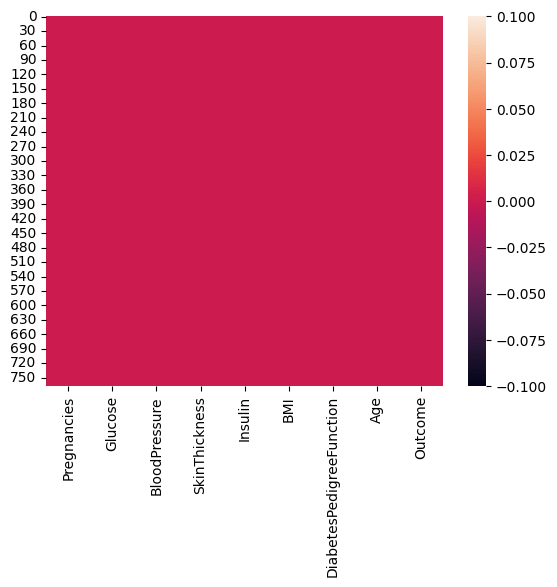

In [7]:
sns.heatmap(total_data.isnull())

Dataset is fully cleansed

### Numerical dataset, so piecharts might not be indicated to plot the data

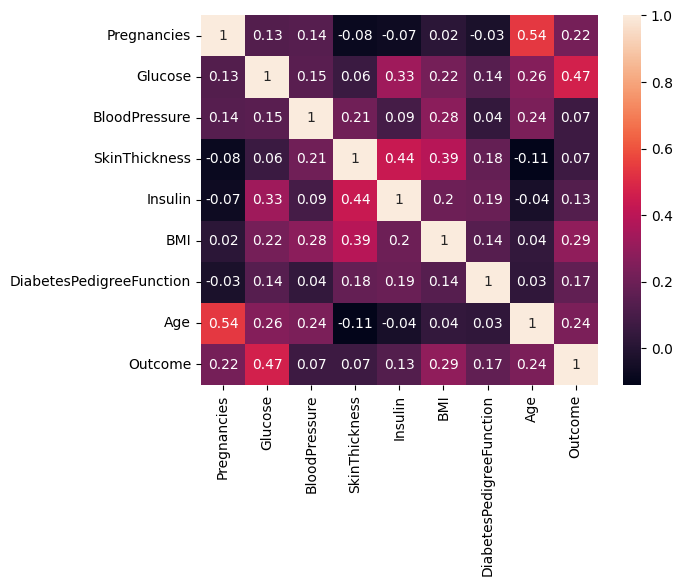

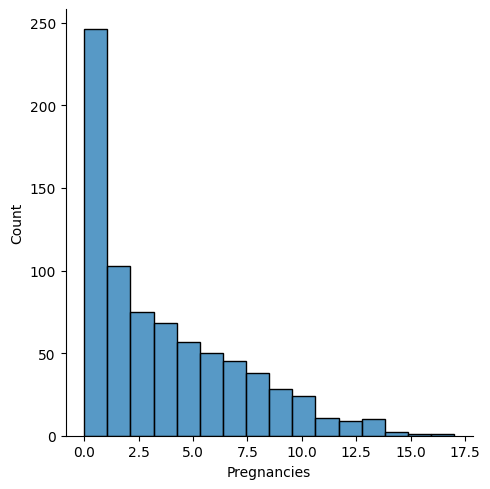

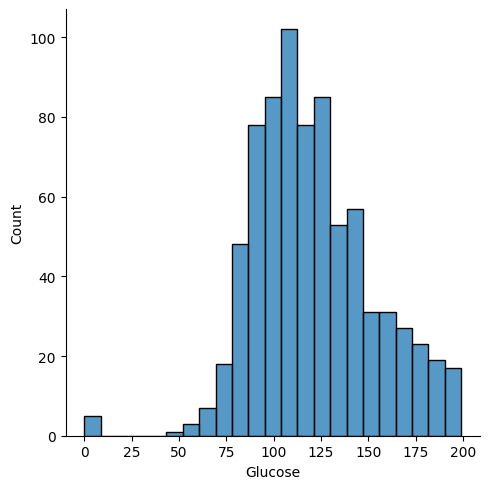

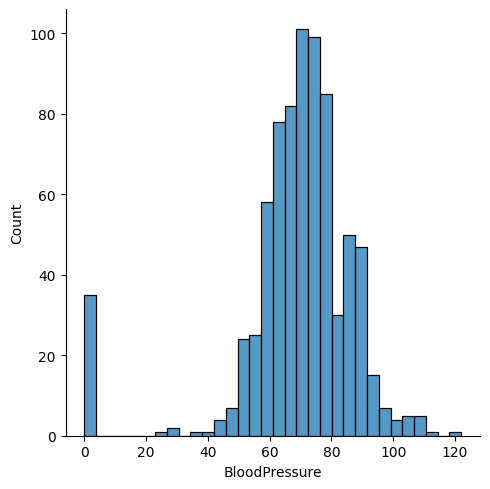

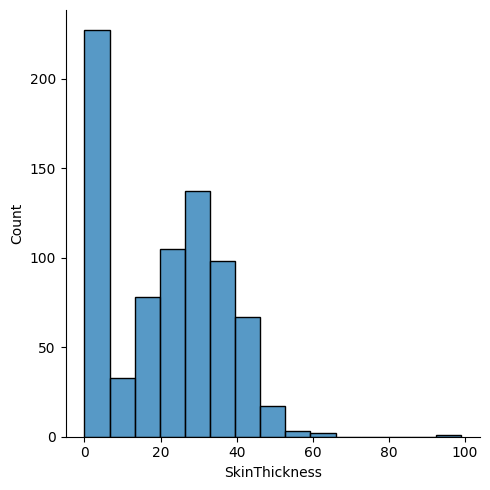

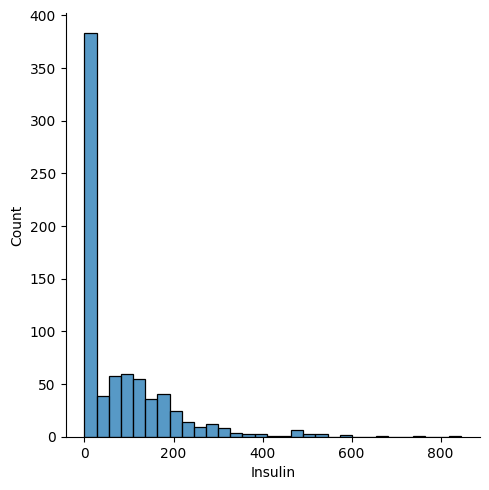

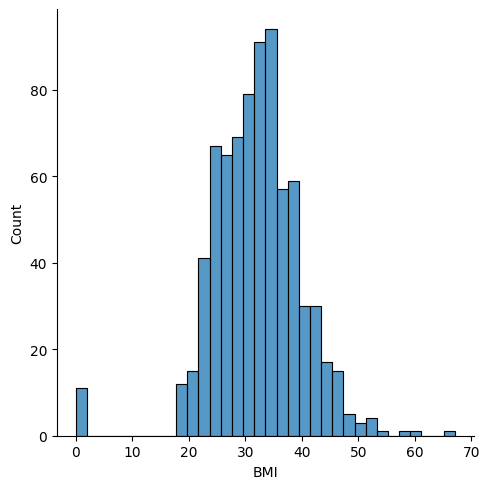

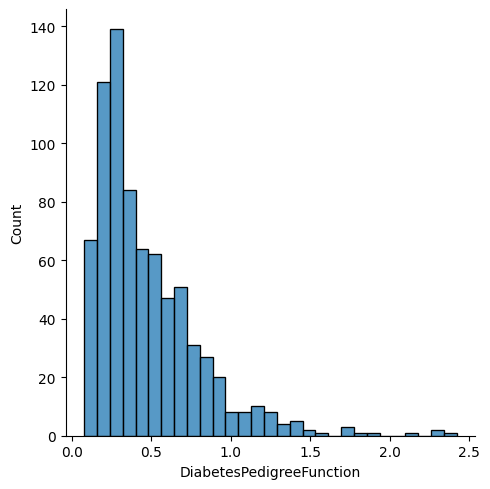

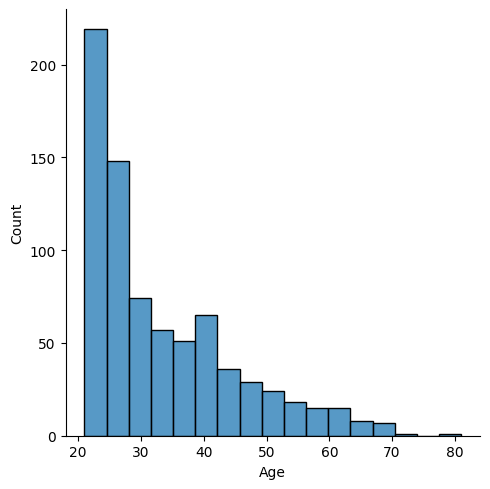

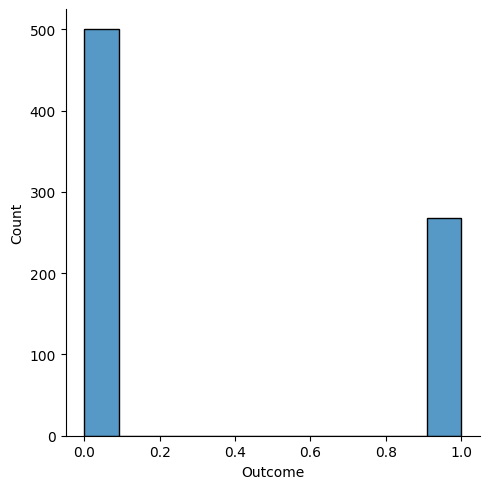

In [10]:
sns.heatmap(np.round(total_data.corr(), 2), annot=True)
for c in total_data.columns:
    sns.displot(total_data[c])

<Axes: ylabel='Glucose'>

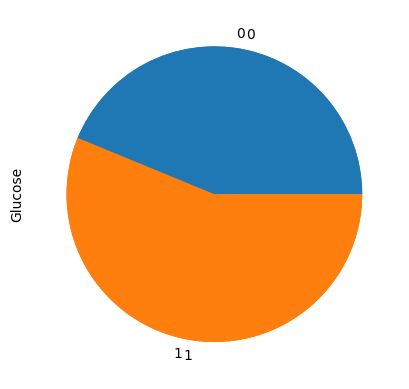

In [40]:
age_data = total_data.groupby('Outcome').Age.mean()
glucose_data = total_data.groupby('Outcome').Glucose.mean()
age_data.plot.pie()
glucose_data.plot.pie()

⚠️ OUTCOME VARIABLE (TARGET) IS INBALANCED

## Feature selection

In [18]:
X = total_data.drop("Outcome", axis = 1)
Y = total_data["Outcome"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                   random_state=42,  
                                   test_size=0.25,  
                                   shuffle=True)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, Y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,13.0,129.0,0.0,0.0,39.9,0.569,44.0
1,4.0,129.0,86.0,270.0,35.1,0.231,23.0
2,3.0,61.0,82.0,0.0,34.4,0.243,46.0
3,2.0,81.0,72.0,76.0,30.1,0.547,25.0
4,0.0,102.0,75.0,0.0,0.0,0.572,21.0


<Axes: xlabel='Pregnancies', ylabel='Outcome'>

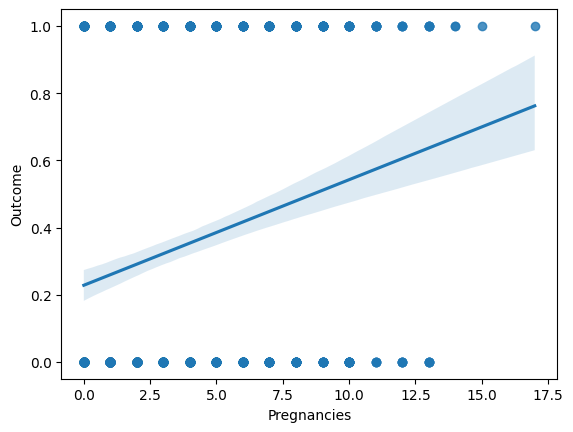

In [44]:
sns.regplot(x=total_data.Pregnancies, y=total_data.Outcome)

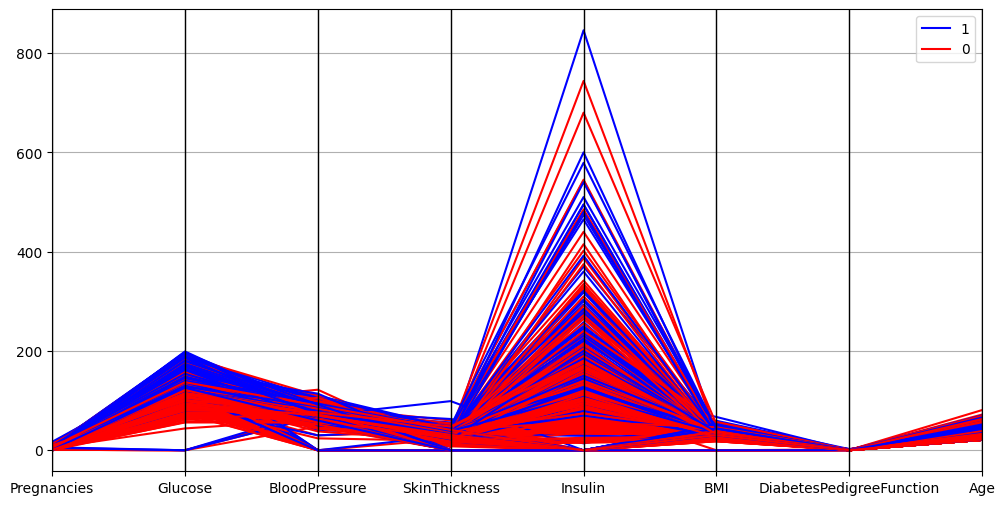

In [19]:
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("blue", "red"))

plt.show()

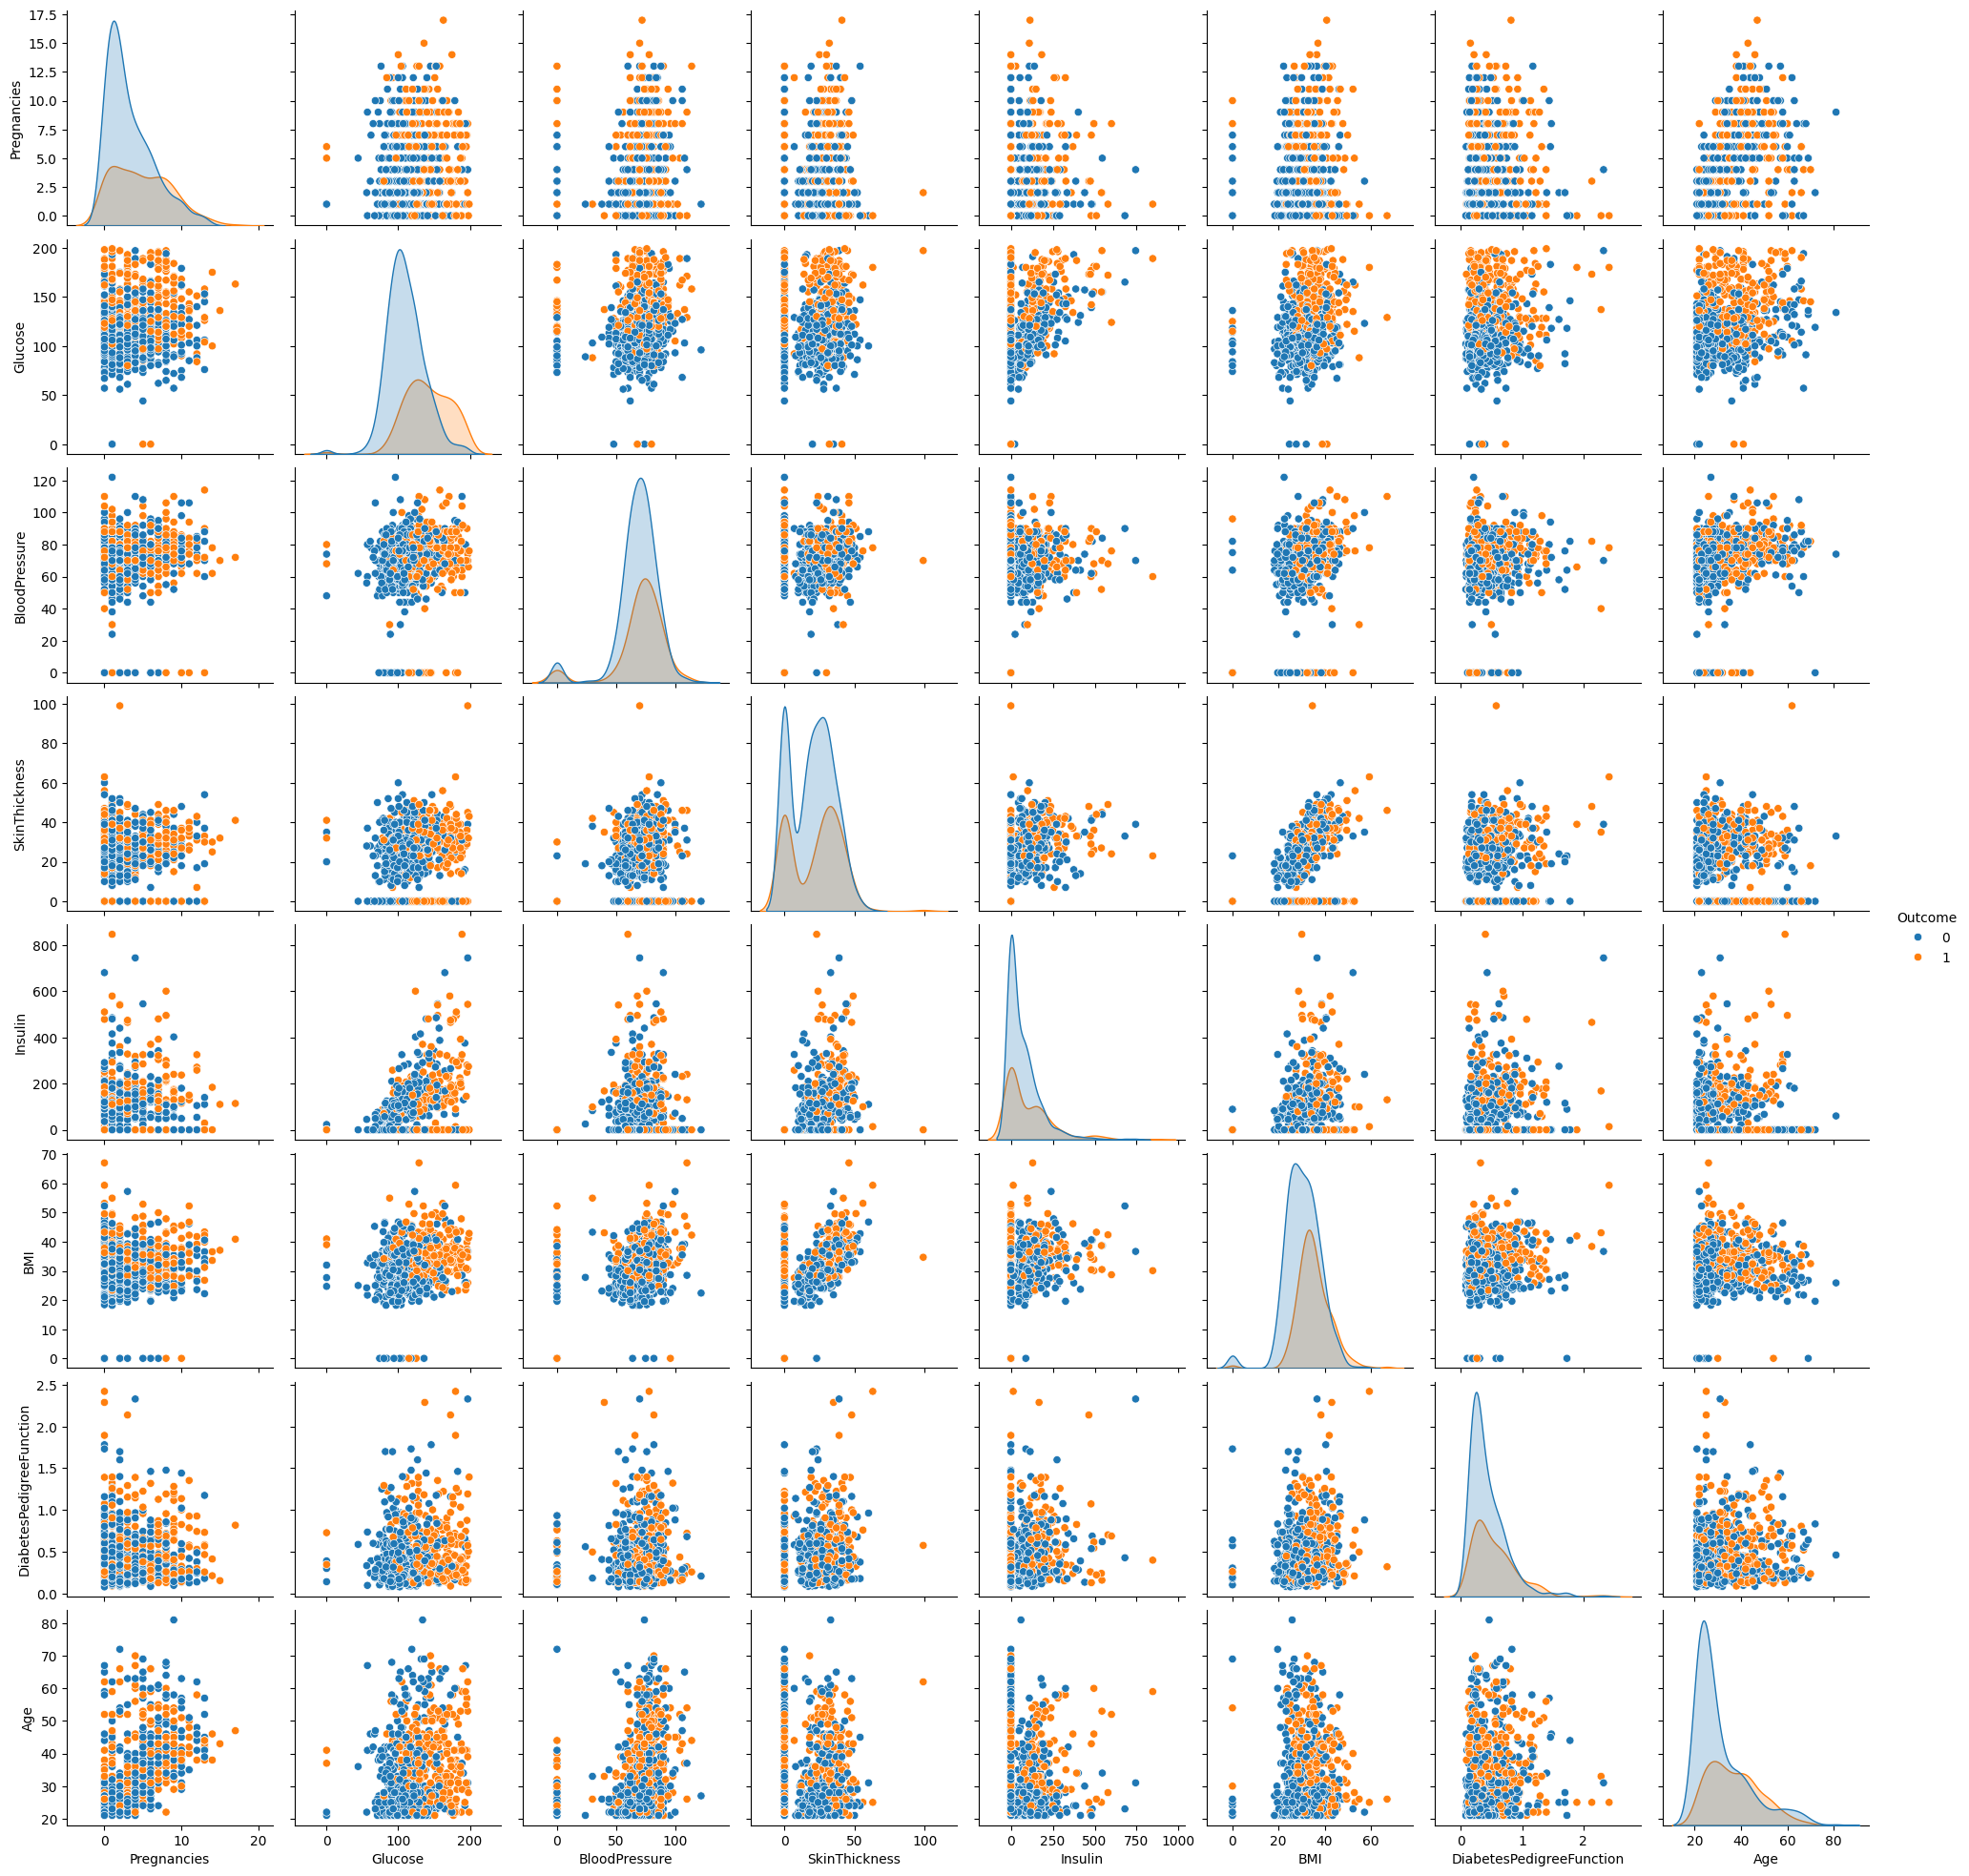

In [47]:
sns.pairplot(data= total_data,hue='Outcome')

## Decision tree model

In [50]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_sel, Y_train)

DecisionTreeClassifier(random_state=42)

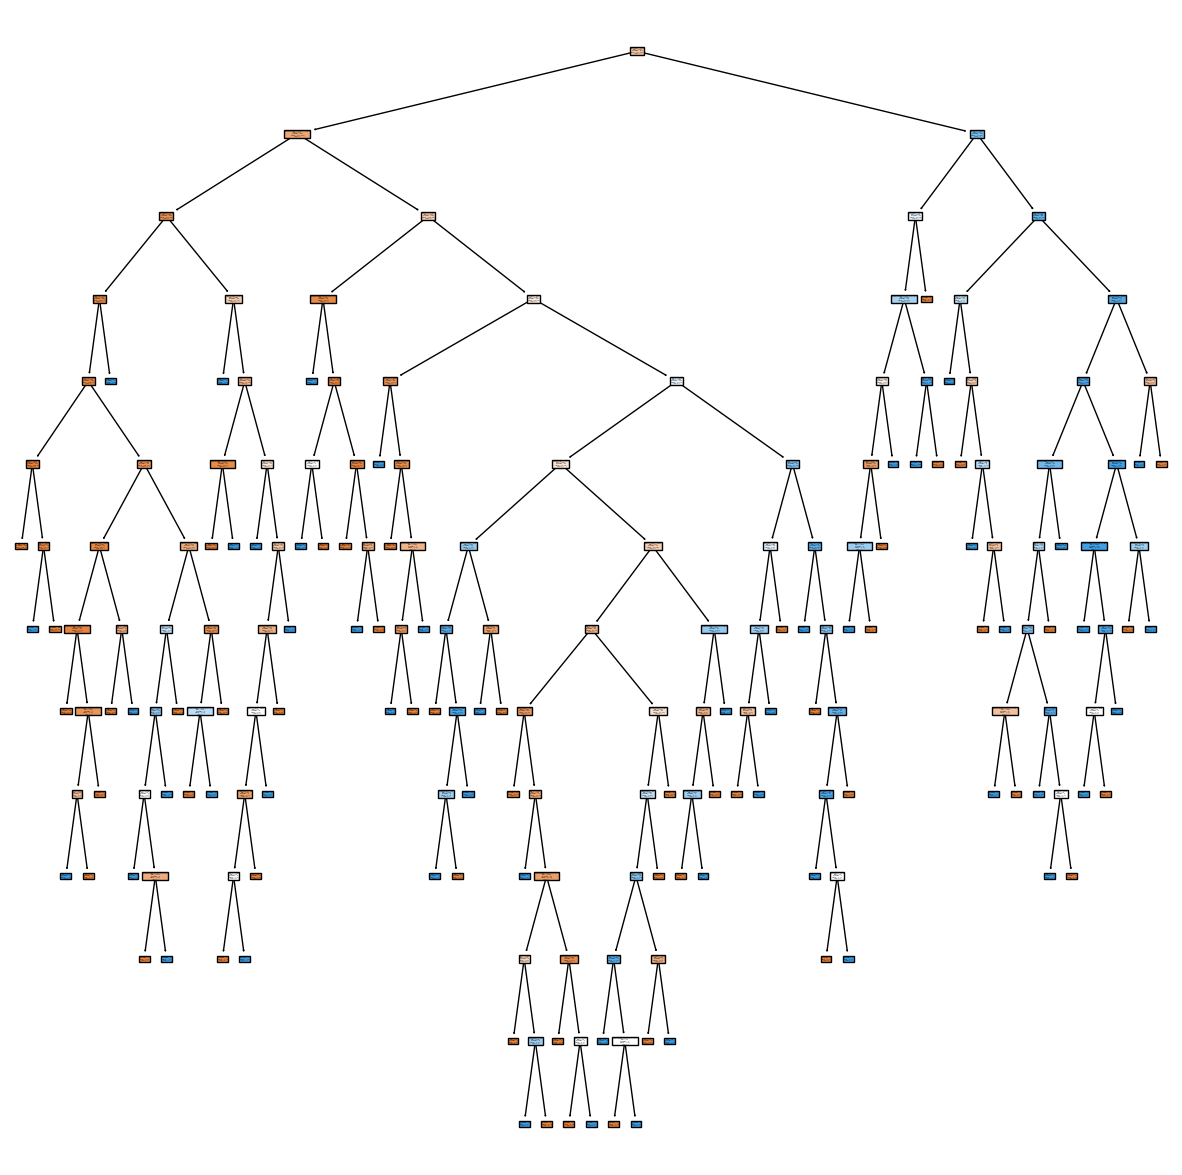

In [51]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

### Model evaluation

Accuracy of the classifier is: 0.6927083333333334


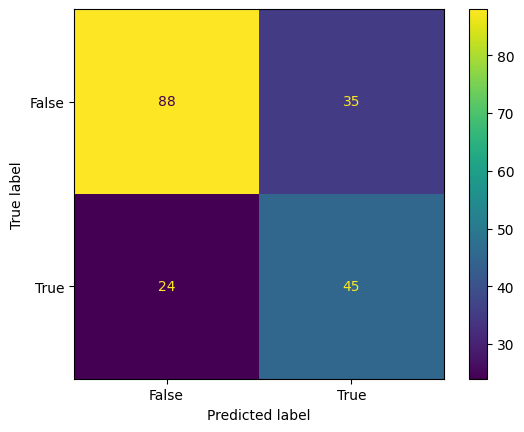

Precision Score of the classifier is: 0.5625
Recall Score of the classifier is: 0.6521739130434783
F1 Score of the classifier is: 0.6040268456375839


In [52]:
y_pred = model.predict(X_test_sel)

print(f"Accuracy of the classifier is: {accuracy_score(Y_test, y_pred)}")

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, y_pred), display_labels = [False, True])
cm_display.plot()
plt.show()


print(f"Precision Score of the classifier is: {precision_score(Y_test, y_pred)}")

print(f"Recall Score of the classifier is: {recall_score(Y_test, y_pred)}")

print(f"F1 Score of the classifier is: {f1_score(Y_test, y_pred)}")

Not really that good...

## Model tunification

In [74]:
hyperparams = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10, 20, 40],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4, 8],
}

grid = GridSearchCV(model, hyperparams, scoring = "f1", cv = 5)
grid

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                              min_samples_leaf=8,
                                              min_samples_split=10),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20, 40],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5]},
             scoring='f1')

In [88]:
hyperparamsRand = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10, 20, 40],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "min_weight_fraction_leaf": [0.3, 0.5, 0.7],
    "max_features": ['auto', 'sqrt', 'log2', 1, 2, 3, 4, 5, 6, 7],
    "min_impurity_decrease": [0.0, 0.1, 0.2, 0.3]
}

randSearch = RandomizedSearchCV(model, hyperparamsRand, scoring="f1", cv=5)
randSearch

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(min_samples_leaf=8),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 10, 20, 40],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         1, 2, 3, 4, 5, 6, 7],
                                        'min_impurity_decrease': [0.0, 0.1, 0.2,
                                                                  0.3],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'min_weight_fraction_leaf': [0.3, 0.5,
                                                                     0.7]},
                   scoring='f1')

In [75]:
grid.fit(X_train_sel, Y_train)

print(f"Best hyperparameters grid: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [89]:
randSearch.fit(X_train_sel, Y_train)
print(f"Best hyperparameters random search: {randSearch.best_params_}")

Best hyperparameters random search: {'min_weight_fraction_leaf': 0.3, 'min_samples_split': 10, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.1, 'max_features': 7, 'max_depth': None, 'criterion': 'log_loss'}


/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/cod

In [90]:
modelGrid = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=8, min_samples_split=2)
modelGrid.fit(X_train_sel, Y_train)

modelRand = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=4, min_samples_split=10, min_impurity_decrease=0.1, max_features=7, )
modelRand.fit(X_train_sel, Y_train)

DecisionTreeClassifier(criterion='log_loss', max_features=7,
                       min_impurity_decrease=0.1, min_samples_leaf=4,
                       min_samples_split=10)

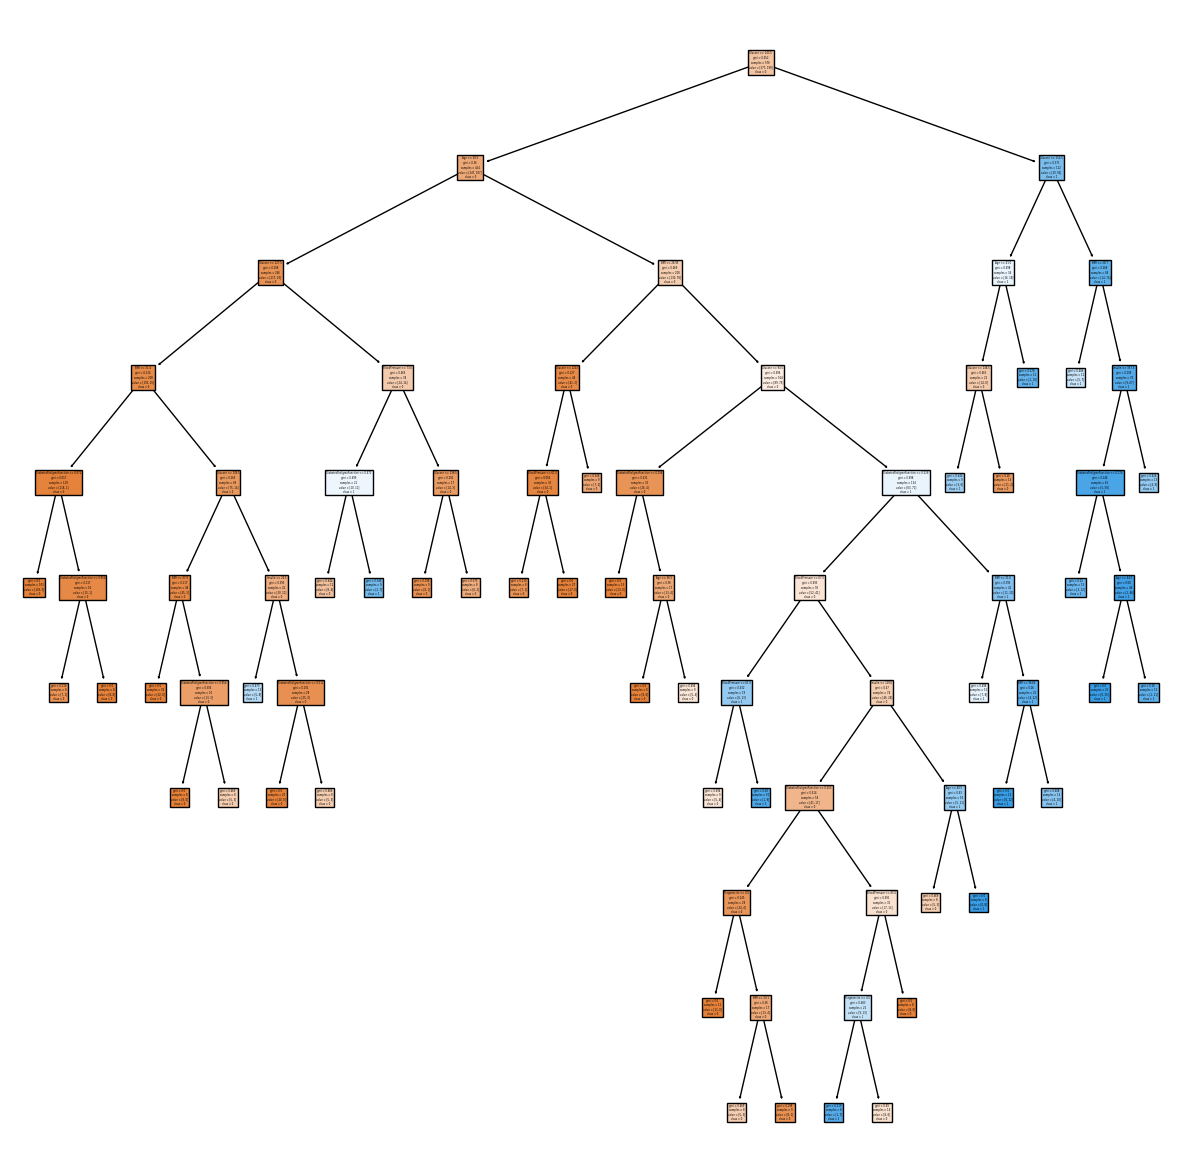

In [77]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(modelGrid, feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

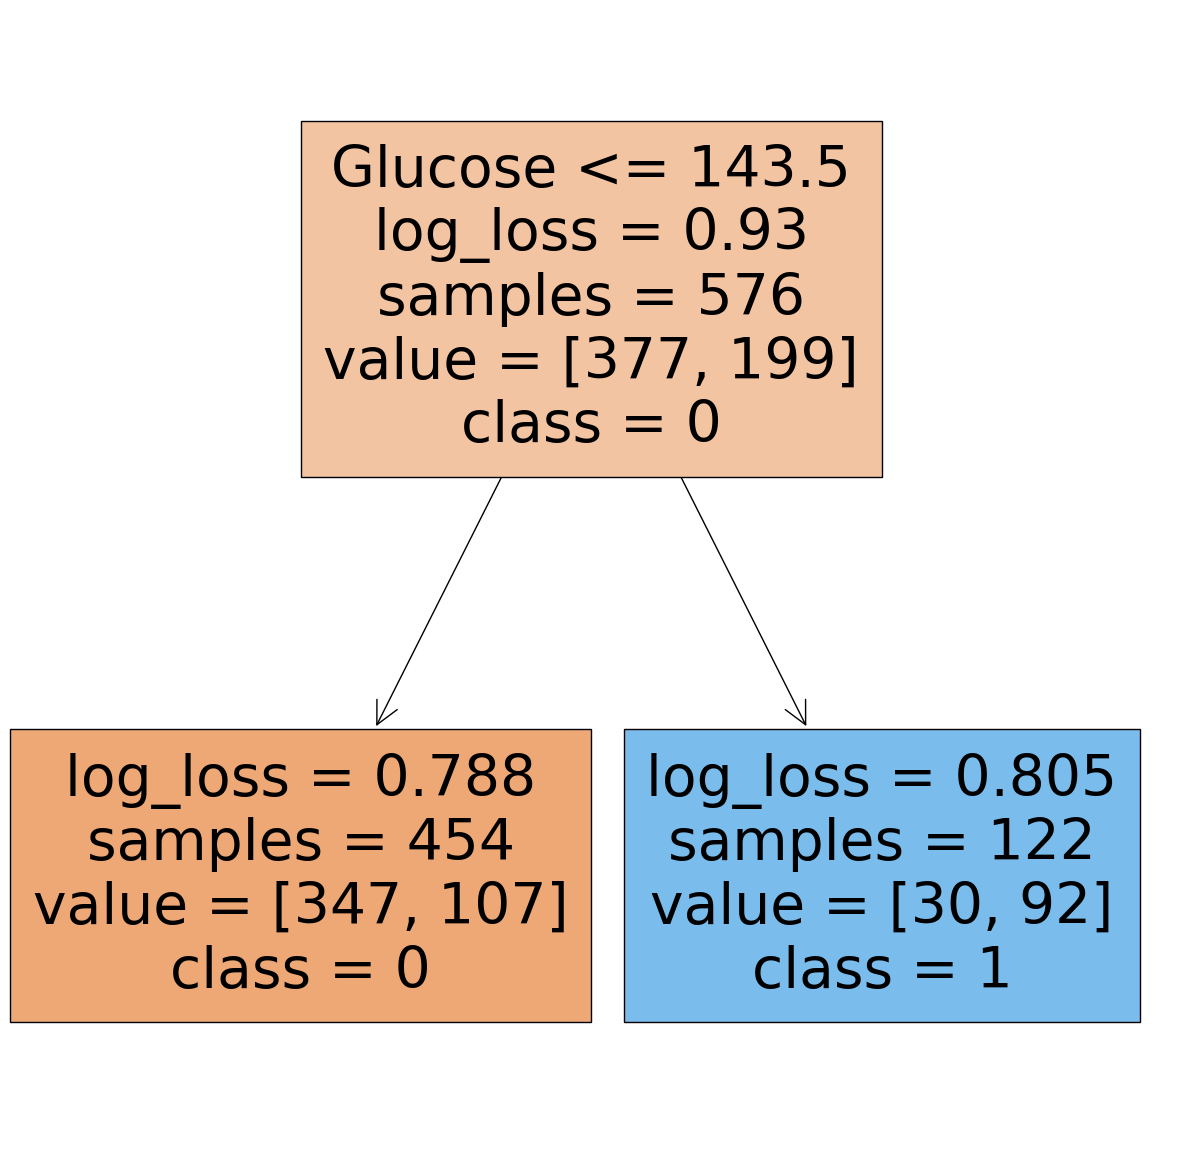

In [91]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(modelRand, feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

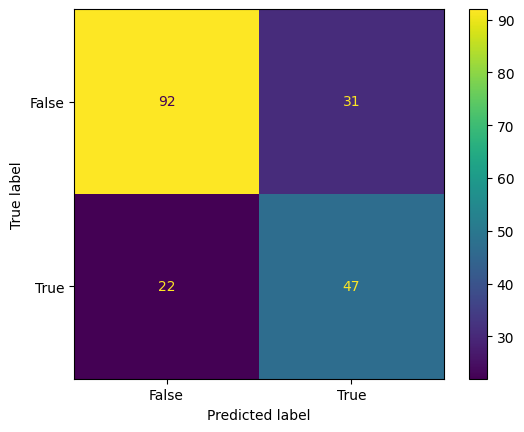

Accuracy of the classifier is: 0.7239583333333334
Precision Score of the classifier is: 0.6025641025641025
Recall Score of the classifier is: 0.6811594202898551
F1 Score of the classifier is: 0.6394557823129252


In [92]:
y_pred = modelGrid.predict(X_test_sel)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, y_pred), display_labels = [False, True])
cm_display.plot()
plt.show()

print(f"Accuracy of the classifier is: {accuracy_score(Y_test, y_pred)}")

print(f"Precision Score of the classifier is: {precision_score(Y_test, y_pred)}")

print(f"Recall Score of the classifier is: {recall_score(Y_test, y_pred)}")

print(f"F1 Score of the classifier is: {f1_score(Y_test, y_pred)}")

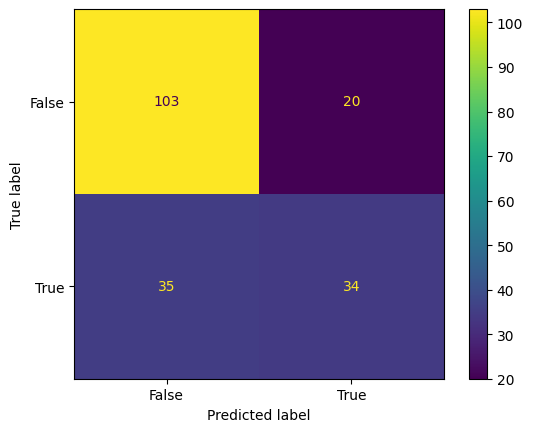

Accuracy of the classifier is: 0.7135416666666666
Precision Score of the classifier is: 0.6296296296296297
Recall Score of the classifier is: 0.4927536231884058
F1 Score of the classifier is: 0.5528455284552846


In [93]:
y_pred = modelRand.predict(X_test_sel)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, y_pred), display_labels = [False, True])
cm_display.plot()
plt.show()

print(f"Accuracy of the classifier is: {accuracy_score(Y_test, y_pred)}")

print(f"Precision Score of the classifier is: {precision_score(Y_test, y_pred)}")

print(f"Recall Score of the classifier is: {recall_score(Y_test, y_pred)}")

print(f"F1 Score of the classifier is: {f1_score(Y_test, y_pred)}")